In [1]:
# Importing the Libraries

In [16]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
!pip install matplotlib wordcloud

     -------------------------------------- 300.6/300.6 kB 6.2 MB/s eta 0:00:00


In [4]:
# Reading the dataset

In [5]:
df = pd.read_csv('blogs_categories.csv', index_col=0)

In [6]:
# EDA

In [7]:
df.head()

,Data,Labels
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    19997 non-null  object
 1   Labels  19997 non-null  object
dtypes: object(2)
memory usage: 468.7+ KB


In [9]:
# Check distribution of Categories

In [10]:
df['Labels'].value_counts()

alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: Labels, dtype: int64

# plotting WordCloud

In [12]:
from wordcloud import WordCloud

In [13]:
all_text = ' '.join(df['Data'])

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

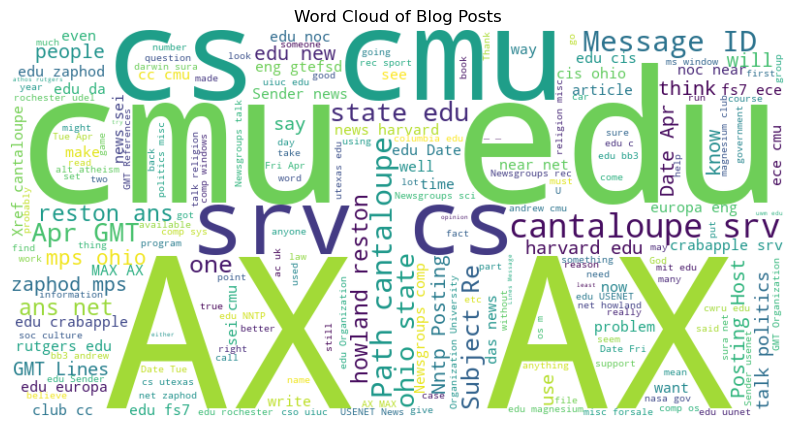

In [17]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Blog Posts')
plt.show()

In [19]:
# Plotting Bar Plot of Category Distribution:

In [20]:
import seaborn as sns

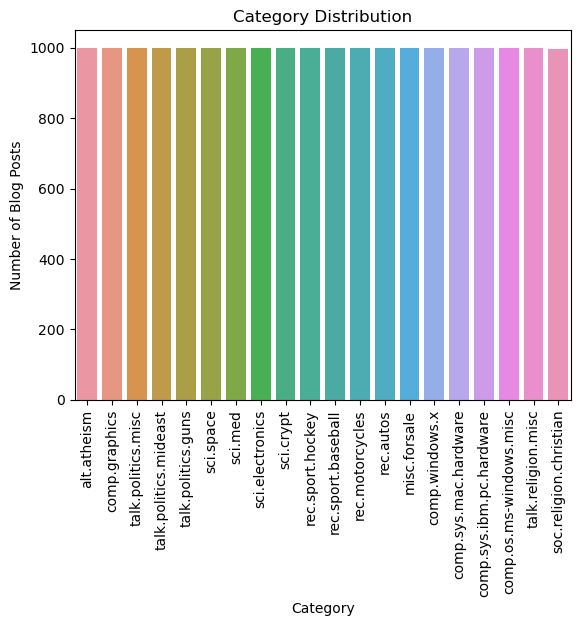

In [23]:
sns.barplot(x=df['Labels'].value_counts().index, y=df['Labels'].value_counts().values)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Blog Posts')
plt.xticks(rotation=90)
plt.show()

# Data preprocessing

In [120]:
import string

In [121]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [122]:
df['Cleaned_Text'] = df['Data'].apply(preprocess_text)

In [123]:
df

,Data,Labels,Cleaned_Text
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51121 soc...
...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54482 tal...
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54485 tal...
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...


In [124]:
# Performing TF-IDF

In [125]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data
tfidf_vectorizer = TfidfVectorizer()  # Limit vocabulary size to 5000 features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Text'])

In [126]:
tfidf_matrix

<19997x252727 sparse matrix of type '<class 'numpy.float64'>'
	with 2573213 stored elements in Compressed Sparse Row format>

In [127]:
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf_vectorizer.get_feature_names_out())

In [128]:
tfidf_df

,00,000,0000,00000,000000,00000000,0000000004,00000000b,00000001,00000001b,...,zz960,zzc2,zzr11,zzr1100,zztvtz8nt2h,zzzs,zzzz,zzzzzz,zzzzzzcraycom,zzzzzzt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
# Applying Naive Bayes Classifier

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [132]:
# Define features (X) and target variable (y)
X = tfidf_matrix  # Features (TF-IDF matrix)
y = df['Labels']  # Target variable (categories)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [134]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.894

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.87      0.91      0.89       179
 comp.os.ms-windows.misc       0.94      0.87      0.90       226
comp.sys.ibm.pc.hardware       0.84      0.84      0.84       204
   comp.sys.mac.hardware       0.89      0.96      0.92       205
          comp.windows.x       0.97      0.94      0.95       186
            misc.forsale       0.90      0.77      0.83       190
               rec.autos       0.90      0.94      0.92       203
         rec.motorcycles       1.00      0.96      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.88      0.98      0.93       200
         sci.electronics       0.93      0.89      0.91       227
                 sci.med       1.00

In [135]:
!pip install vaderSentiment

     -------------------------------------- 126.0/126.0 kB 7.7 MB/s eta 0:00:00


In [136]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [137]:
# Function to perform sentiment analysis and categorize the sentiment
def get_sentiment(text):
    # Perform sentiment analysis
    sentiment_scores = analyzer.polarity_scores(text)
    # Categorize the sentiment
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)


In [138]:
df

,Data,Labels,Cleaned_Text,Sentiment
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,xref cantaloupesrvcscmuedu altatheism49960 alt...,positive
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51060 alt...,positive
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,negative
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51120 alt...,positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51121 soc...,negative
...,...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54482 tal...,negative
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54485 tal...,positive
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,positive
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,positive


In [142]:
# Group by category and sentiment, and count the occurrences
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# Display the distribution of sentiments across categories
print("\nDistribution of Sentiments Across Different Categories:")
print(sentiment_distribution)


Distribution of Sentiments Across Different Categories:
Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                    366        7       627
comp.graphics                  112       44       844
comp.os.ms-windows.misc        180       42       778
comp.sys.ibm.pc.hardware       191       17       792
comp.sys.mac.hardware          231       46       723
comp.windows.x                 216       41       743
misc.forsale                   129       65       806
rec.autos                      299       22       679
rec.motorcycles                285       18       697
rec.sport.baseball             212       36       752
rec.sport.hockey               248       12       740
sci.crypt                      304        6       690
sci.electronics                183       29       788
sci.med                        318       21       661
sci.space                      255       18       727
soc.religion.christian   